In [292]:
ancestral_sequence_file = "/Users/gc3045/laml2_experiments/proc_realdata/baseMemoir/impute_sequences/p2_imputed_sequences.txt"
laml2_tree_file = "/Users/gc3045/laml2_experiments/proc_realdata/baseMemoir/baseMemoir_runs/LAML2_p2_baseMem_trees.nwk"
msa_path = '/Users/gc3045/laml2_experiments/proc_realdata/baseMemoir/baseMemoir.msa.txt'
baseMem_tree_file = "/Users/gc3045/laml2_experiments/proc_realdata/baseMemoir_p2.nwk"
import treeswift
import pandas as pd
import scipy
import ast
from Bio import Phylo
import skbio
import numpy as np

In [293]:
pip install scikit-bio


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [294]:
baseMem_t = treeswift.read_tree_newick(baseMem_tree_file)
for n in baseMem_t.traverse_leaves():
    n.label = f"pos2_cell{n.label}"
baseMem_distmat = baseMem_t.distance_matrix(leaf_labels=True)

In [295]:
baseMem_distmat

{'pos2_cell12': {'pos2_cell4': 2.8315,
  'pos2_cell23': 3.0084600000000004,
  'pos2_cell1': 3.28855,
  'pos2_cell16': 3.93367,
  'pos2_cell25': 3.93367,
  'pos2_cell30': 3.93367,
  'pos2_cell10': 4.421250000000001,
  'pos2_cell32': 4.421239999999999,
  'pos2_cell5': 4.42124,
  'pos2_cell6': 4.42124,
  'pos2_cell15': 4.42125,
  'pos2_cell20': 4.42125,
  'pos2_cell11': 4.421250000000001,
  'pos2_cell9': 4.421250000000001,
  'pos2_cell34': 4.421250000000001,
  'pos2_cell14': 4.421250000000001,
  'pos2_cell18': 4.42126,
  'pos2_cell33': 4.42126,
  'pos2_cell35': 4.42126,
  'pos2_cell13': 5.96797,
  'pos2_cell31': 5.96797,
  'pos2_cell24': 5.967980000000001,
  'pos2_cell3': 5.967980000000001,
  'pos2_cell17': 5.967980000000001,
  'pos2_cell28': 5.967980000000001,
  'pos2_cell8': 5.967980000000001,
  'pos2_cell26': 5.967980000000001,
  'pos2_cell27': 5.967980000000001,
  'pos2_cell29': 5.967980000000001},
 'pos2_cell4': {'pos2_cell12': 2.8315,
  'pos2_cell23': 3.0084600000000004,
  'pos2_cel

In [296]:
laml2_t = treeswift.read_tree_newick(laml2_tree_file)
laml2_distmat = laml2_t.distance_matrix(leaf_labels=True)

In [297]:
laml2_distmat

{'pos2_cell12': {'pos2_cell3': 0.126964,
  'pos2_cell13': 1.010402,
  'pos2_cell6': 1.010402,
  'pos2_cell25': 1.852668,
  'pos2_cell16': 1.852668,
  'pos2_cell24': 1.852668,
  'pos2_cell30': 1.852668,
  'pos2_cell31': 1.852668,
  'pos2_cell4': 1.852668,
  'pos2_cell1': 1.852668,
  'pos2_cell23': 1.852668,
  'pos2_cell17': 1.853857,
  'pos2_cell26': 1.8538579999999998,
  'pos2_cell28': 1.8538579999999998,
  'pos2_cell27': 1.853857,
  'pos2_cell8': 1.853857,
  'pos2_cell29': 1.853857,
  'pos2_cell34': 1.8766669999999999,
  'pos2_cell20': 1.919964,
  'pos2_cell11': 1.919964,
  'pos2_cell18': 1.919964,
  'pos2_cell32': 1.919964,
  'pos2_cell33': 1.9199640000000002,
  'pos2_cell35': 1.9199640000000002,
  'pos2_cell5': 1.9199650000000001,
  'pos2_cell10': 1.9199650000000001,
  'pos2_cell14': 1.954996,
  'pos2_cell9': 1.954996,
  'pos2_cell15': 1.9549949999999998},
 'pos2_cell3': {'pos2_cell12': 0.126964,
  'pos2_cell13': 1.010402,
  'pos2_cell6': 1.010402,
  'pos2_cell25': 1.852668,
  'pos2

In [298]:
def hamming_distance_missing(x, y, missing_char):
    hd = 0
    for i, xval in enumerate(x):
        yval = y[i]
        if xval != yval:
            if xval == missing_char and yval == missing_char:
                hd += 0
            elif xval == missing_char and yval != missing_char:
                hd += 0
            elif xval != missing_char and yval == missing_char:
                hd += 0
            else:
                hd += 1
    return hd/(len(x))

In [299]:
x = [-1, 1, 0]
y = [0, 0, 1]
hamming_distance_missing(x, y, -1)

0.6666666666666666

In [300]:
x = [-1, 1, 0]
y = [0, -1, 1]

hamming_distance_missing(x, y, -1)

0.3333333333333333

In [301]:
df = pd.read_csv(msa_path)
df['position'] = df['cell_names'].str.extract(r'^(pos\d+)_')
df_pos = df[df['position'] == "pos2"]

baseMem_genotypes = dict()

cols_of_interest = df.columns[1:-1]
# extract all sequences
for _, row in df_pos.iterrows():
    cell_name = row['cell_names']
    genotype = row[cols_of_interest].values.tolist()
    baseMem_genotypes[cell_name] = genotype

In [302]:
len(baseMem_genotypes['pos2_cell1'])

396

In [360]:
baseMem_path = "/Users/gc3045/laml2_experiments/proc_realdata/baseMem_pos2_genotypes.csv"

baseMem_genotypes_df = pd.DataFrame(baseMem_genotypes).T
baseMem_genotypes_df.to_csv(baseMem_path)

In [303]:
laml2_genotypes = dict()

#df = pd.read_csv(ancestral_sequence_file, sep=" ")
#df
print(ancestral_sequence_file)
with open(ancestral_sequence_file, "r") as f:
    lines = f.readlines()
    for line in lines:
        cell_name = line.split()[0]
        rest = line[len(cell_name)+1:]
        imputed_genotype = ast.literal_eval(rest)
        imputed_genotype = [x[0] for x in imputed_genotype]
        # print(cell_name, imputed_genotype)
        
        #imputed_genotype = ast.literal_eval(line)
        laml2_genotypes[cell_name] = imputed_genotype

/Users/gc3045/laml2_experiments/proc_realdata/baseMemoir/impute_sequences/p2_imputed_sequences.txt


In [304]:
laml2_genotype_df = pd.DataFrame(laml2_genotypes).T
laml2_genotype_df

,0,1,2,3,4,5,6,7,8,9,...,386,387,388,389,390,391,392,393,394,395
pos2_cell15,0,1,0,1,3,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
pos2_cell9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,3,2,3,2,1
pos2_cell14,1,2,2,0,3,0,0,0,0,0,...,0,3,0,0,0,0,0,0,0,0
pos2_cell10,1,2,0,3,3,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
pos2_cell5,0,0,0,3,0,0,0,0,0,0,...,0,3,0,2,0,0,0,0,0,0
pos2_cell35,1,3,0,2,1,3,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
pos2_cell33,1,0,2,2,1,0,1,0,0,2,...,0,3,1,1,2,0,0,0,0,0
pos2_cell32,1,0,0,2,1,0,1,1,0,2,...,0,3,0,1,1,0,0,2,0,0
pos2_cell18,3,0,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,3,0,0,0
pos2_cell11,1,0,0,0,0,0,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [354]:
output_path = "/Users/gc3045/laml2_experiments/proc_realdata/laml2_pos2_genotypes.csv"

laml2_genotype_df.to_csv(output_path)

In [305]:
for col in laml2_genotype_df:
    print(laml2_genotype_df[col].unique())

[0 1 3]
[1 0 2 3]
[0 2 3]
[1 0 3 2]
[3 0 1]
[3 0]
[0 1 2]
[0 1]
[0]
[0 2 1]
[0 1 3]
[0 3]
[0 1]
[0 2 1]
[3 0 2 1]
[2 3 0]
[0 2 1 3]
[2 0 1]
[0 2 1]
[0 2 1]
[0 2]
[0 3 2]
[0 3 1]
[0 1]
[0 1]
[2 0 1]
[0 1 2]
[0 3 2]
[0 1 3]
[1 0 3]
[0 1 3 2]
[0 1 3]
[0 3 2]
[3 0 2]
[1 0 3 2]
[0 1 2]
[0 1 3]
[0 1 2]
[0 2]
[0 2 3]
[0 1 3]
[0 1 3]
[0 3 1]
[0 2 3 1]
[0 2 1 3]
[0 3 2]
[0 1 3]
[0 3 1]
[0 2 1]
[1 0 2]
[0 1 2]
[0 3 2 1]
[0 1 3]
[0 2]
[0 1]
[0 3 1]
[1 0 3 2]
[0 2 3]
[0 3 2 1]
[0 2 1]
[0 1 3]
[0 1 2]
[0 2]
[0 3 2 1]
[0 1 3]
[0 3 1]
[0 1]
[0 3 1]
[2 0 1 3]
[0 2 3]
[3 0]
[0 1 2]
[0 2 1]
[0 3 1]
[0 3 2 1]
[0 1 3 2]
[0 1]
[0 1]
[0 3 1]
[0 3]
[0 1]
[0 2 3 1]
[0 1 3]
[0 2 1 3]
[0 1]
[0 1 3 2]
[0 2 1]
[0 2 3]
[0 3 1 2]
[0 1 2]
[0 3 1]
[0 1 2]
[0 2 1]
[0 2 3]
[0 1 3 2]
[0 3 1]
[0 2 1]
[0 3 1 2]
[0 2 1 3]
[0 3 2 1]
[0 3]
[0 2 3 1]
[1 0 2]
[0 2]
[0]
[0 3 2]
[0 1 3]
[0 3]
[0 1]
[3 0 2 1]
[1 0 2]
[0 2 3]
[3 0 1 2]
[0 1]
[0 1]
[2 1 0 3]
[0 2 3]
[2 0 3]
[1 0 3]
[2 0 1]
[0 1]
[0 3 2]
[0 2 1]
[0 2 3]
[0 1 3]
[0 3

In [306]:
len(laml2_genotypes['pos2_cell15'])

396

In [307]:
len(baseMem_genotypes), len(laml2_genotypes)

(35, 30)

In [308]:
laml2_genotypes

{'pos2_cell15': [0,
  1,
  0,
  1,
  3,
  3,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  3,
  2,
  0,
  2,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  2,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  3,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  2,
  0,
  3,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  3,
  1,
  0,
  3,
  0,
  0,
  2,
  0,
  2,
  1,
  2,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  3,
  2,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  2,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  3,
  3,
  2,
  1,
  3,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,


In [309]:
laml2_genotype_distmat = dict()
for cell_name_i in laml2_genotypes:
    for cell_name_j in laml2_genotypes:
        if cell_name_i not in laml2_genotype_distmat:
            laml2_genotype_distmat[cell_name_i] = dict()
        genotype_1 = laml2_genotypes[cell_name_i]
        genotype_2 = laml2_genotypes[cell_name_j]
        laml2_genotype_distmat[cell_name_i][cell_name_j] = hamming_distance_missing(genotype_1, genotype_2, -1)

laml2_genotype_distmat

{'pos2_cell15': {'pos2_cell15': 0.0,
  'pos2_cell9': 0.2676767676767677,
  'pos2_cell14': 0.26515151515151514,
  'pos2_cell10': 0.29292929292929293,
  'pos2_cell5': 0.3409090909090909,
  'pos2_cell35': 0.37373737373737376,
  'pos2_cell33': 0.34595959595959597,
  'pos2_cell32': 0.43434343434343436,
  'pos2_cell18': 0.255050505050505,
  'pos2_cell11': 0.3181818181818182,
  'pos2_cell20': 0.31565656565656564,
  'pos2_cell34': 0.351010101010101,
  'pos2_cell29': 0.3055555555555556,
  'pos2_cell8': 0.20959595959595959,
  'pos2_cell27': 0.26515151515151514,
  'pos2_cell28': 0.28535353535353536,
  'pos2_cell26': 0.2777777777777778,
  'pos2_cell17': 0.2398989898989899,
  'pos2_cell23': 0.30808080808080807,
  'pos2_cell1': 0.33080808080808083,
  'pos2_cell4': 0.2727272727272727,
  'pos2_cell31': 0.27525252525252525,
  'pos2_cell30': 0.3611111111111111,
  'pos2_cell24': 0.3888888888888889,
  'pos2_cell16': 0.3560606060606061,
  'pos2_cell25': 0.2196969696969697,
  'pos2_cell6': 0.267676767676767

In [310]:
baseMem_genotype_distmat = dict()
for cell_name_i in baseMem_genotypes:
    for cell_name_j in baseMem_genotypes:
        if cell_name_i not in baseMem_genotype_distmat:
            baseMem_genotype_distmat[cell_name_i] = dict()
        genotype_1 = baseMem_genotypes[cell_name_i]
        genotype_2 = baseMem_genotypes[cell_name_j]
        baseMem_genotype_distmat[cell_name_i][cell_name_j] = hamming_distance_missing(genotype_1, genotype_2, -1)

baseMem_genotype_distmat

{'pos2_cell1': {'pos2_cell1': 0.0,
  'pos2_cell2': 0.2297979797979798,
  'pos2_cell3': 0.23232323232323232,
  'pos2_cell4': 0.23232323232323232,
  'pos2_cell5': 0.2777777777777778,
  'pos2_cell6': 0.22727272727272727,
  'pos2_cell7': 0.2727272727272727,
  'pos2_cell8': 0.17929292929292928,
  'pos2_cell9': 0.22727272727272727,
  'pos2_cell10': 0.23737373737373738,
  'pos2_cell11': 0.2398989898989899,
  'pos2_cell12': 0.2601010101010101,
  'pos2_cell13': 0.18434343434343434,
  'pos2_cell14': 0.20202020202020202,
  'pos2_cell15': 0.15151515151515152,
  'pos2_cell16': 0.255050505050505,
  'pos2_cell17': 0.17929292929292928,
  'pos2_cell18': 0.20959595959595959,
  'pos2_cell19': 0.21212121212121213,
  'pos2_cell20': 0.2702020202020202,
  'pos2_cell21': 0.21212121212121213,
  'pos2_cell22': 0.18181818181818182,
  'pos2_cell23': 0.23737373737373738,
  'pos2_cell24': 0.3005050505050505,
  'pos2_cell25': 0.26515151515151514,
  'pos2_cell26': 0.13131313131313133,
  'pos2_cell27': 0.2626262626262

In [311]:
# # hamming distance between cells in each
# for cell_name in laml2_genotypes:
#     baseMem_genotype = baseMem_genotypes[cell_name]
#     laml2_genotype = laml2_genotypes[cell_name]
#     #print(baseMem_genotype)
#     #print(laml2_genotype)
#     #print(cell_name, hamming_distance_missing(laml2_genotype, baseMem_genotype, -1))

In [312]:
baseMem_distmat_df = pd.DataFrame.from_dict(baseMem_distmat, orient='index').fillna(0)
ordered_labels = sorted(baseMem_distmat_df.columns)
baseMem_distmat_df = baseMem_distmat_df.reindex(index=ordered_labels, columns=ordered_labels)

baseMem_distmat_df

,pos2_cell1,pos2_cell10,pos2_cell11,pos2_cell12,pos2_cell13,pos2_cell14,pos2_cell15,pos2_cell16,pos2_cell17,pos2_cell18,...,pos2_cell31,pos2_cell32,pos2_cell33,pos2_cell34,pos2_cell35,pos2_cell4,pos2_cell5,pos2_cell6,pos2_cell8,pos2_cell9
pos2_cell1,0.00000,4.42124,4.42124,3.28855,5.96796,4.42124,4.42124,3.93366,5.96797,4.42125,...,5.96796,4.42123,4.42125,4.42124,4.42125,3.28855,4.42123,4.42123,5.96797,4.42124
pos2_cell10,4.42124,0.00000,3.84014,4.42125,5.96796,3.84014,3.20628,4.42124,5.96797,3.84015,...,5.96796,2.73145,3.84015,3.84014,3.84015,4.42125,2.73145,2.73145,5.96797,3.84014
pos2_cell11,4.42124,3.84014,0.00000,4.42125,5.96796,3.33092,3.84014,4.42124,5.96797,3.33093,...,5.96796,3.84013,3.33093,2.60558,3.33093,4.42125,3.84013,3.84013,5.96797,2.44534
pos2_cell12,3.28855,4.42125,4.42125,0.00000,5.96797,4.42125,4.42125,3.93367,5.96798,4.42126,...,5.96797,4.42124,4.42126,4.42125,4.42126,2.83150,4.42124,4.42124,5.96798,4.42125
pos2_cell13,5.96796,5.96796,5.96796,5.96797,0.00000,5.96796,5.96796,5.96796,5.64079,5.96797,...,3.77860,5.96795,5.96797,5.96796,5.96797,5.96797,5.96795,5.96795,5.64079,5.96796
pos2_cell14,4.42124,3.84014,3.33092,4.42125,5.96796,0.00000,3.84014,4.42124,5.96797,2.92833,...,5.96796,3.84013,2.92833,3.33092,2.92833,4.42125,3.84013,3.84013,5.96797,3.33092
pos2_cell15,4.42124,3.20628,3.84014,4.42125,5.96796,3.84014,0.00000,4.42124,5.96797,3.84015,...,5.96796,3.20627,3.84015,3.84014,3.84015,4.42125,3.20627,3.20627,5.96797,3.84014
pos2_cell16,3.93366,4.42124,4.42124,3.93367,5.96796,4.42124,4.42124,0.00000,5.96797,4.42125,...,5.96796,4.42123,4.42125,4.42124,4.42125,3.93367,4.42123,4.42123,5.96797,4.42124
pos2_cell17,5.96797,5.96797,5.96797,5.96798,5.64079,5.96797,5.96797,5.96797,0.00000,5.96798,...,5.64079,5.96796,5.96798,5.96797,5.96798,5.96798,5.96796,5.96796,4.75516,5.96797
pos2_cell18,4.42125,3.84015,3.33093,4.42126,5.96797,2.92833,3.84015,4.42125,5.96798,0.00000,...,5.96797,3.84014,2.36670,3.33093,2.81824,4.42126,3.84014,3.84014,5.96798,3.33093


In [313]:
baseMem_genotype_distmat_df = pd.DataFrame.from_dict(baseMem_genotype_distmat, orient='index')

# filter to match baseMem_distmat_df
common_labels = list(set(baseMem_distmat_df.index) & set(baseMem_distmat_df.columns))
baseMem_genotype_distmat_df_filtered = baseMem_genotype_distmat_df.loc[common_labels, common_labels]
baseMem_genotype_distmat_df_filtered

,pos2_cell31,pos2_cell5,pos2_cell24,pos2_cell18,pos2_cell25,pos2_cell28,pos2_cell11,pos2_cell29,pos2_cell35,pos2_cell32,...,pos2_cell1,pos2_cell26,pos2_cell9,pos2_cell33,pos2_cell15,pos2_cell34,pos2_cell17,pos2_cell10,pos2_cell30,pos2_cell13
pos2_cell31,0.000000,0.282828,0.297980,0.159091,0.181818,0.164141,0.260101,0.224747,0.277778,0.330808,...,0.267677,0.126263,0.217172,0.280303,0.169192,0.280303,0.204545,0.184343,0.265152,0.224747
pos2_cell5,0.282828,0.000000,0.315657,0.207071,0.255051,0.164141,0.212121,0.252525,0.303030,0.368687,...,0.277778,0.151515,0.250000,0.280303,0.184343,0.275253,0.222222,0.209596,0.290404,0.207071
pos2_cell24,0.297980,0.315657,0.000000,0.214646,0.282828,0.169192,0.242424,0.250000,0.308081,0.361111,...,0.300505,0.138889,0.260101,0.318182,0.222222,0.247475,0.209596,0.207071,0.353535,0.214646
pos2_cell18,0.159091,0.207071,0.214646,0.000000,0.207071,0.103535,0.184343,0.212121,0.237374,0.252525,...,0.209596,0.080808,0.181818,0.209596,0.128788,0.227273,0.143939,0.159091,0.217172,0.143939
pos2_cell25,0.181818,0.255051,0.282828,0.207071,0.000000,0.171717,0.265152,0.247475,0.275253,0.361111,...,0.265152,0.111111,0.164141,0.250000,0.131313,0.277778,0.179293,0.171717,0.285354,0.189394
pos2_cell28,0.164141,0.164141,0.169192,0.103535,0.171717,0.000000,0.113636,0.143939,0.179293,0.227273,...,0.146465,0.080808,0.148990,0.191919,0.101010,0.184343,0.126263,0.113636,0.199495,0.133838
pos2_cell11,0.260101,0.212121,0.242424,0.184343,0.265152,0.113636,0.000000,0.194444,0.209596,0.310606,...,0.239899,0.095960,0.227273,0.219697,0.176768,0.232323,0.164141,0.171717,0.229798,0.189394
pos2_cell29,0.224747,0.252525,0.250000,0.212121,0.247475,0.143939,0.194444,0.000000,0.234848,0.265152,...,0.247475,0.128788,0.247475,0.242424,0.156566,0.219697,0.179293,0.151515,0.262626,0.194444
pos2_cell35,0.277778,0.303030,0.308081,0.237374,0.275253,0.179293,0.209596,0.234848,0.000000,0.345960,...,0.272727,0.159091,0.267677,0.217172,0.196970,0.247475,0.232323,0.219697,0.315657,0.252525
pos2_cell32,0.330808,0.368687,0.361111,0.252525,0.361111,0.227273,0.310606,0.265152,0.345960,0.000000,...,0.376263,0.159091,0.290404,0.285354,0.227273,0.338384,0.282828,0.262626,0.383838,0.287879


In [314]:
baseMem_genotype_distmat_df_filtered.shape, baseMem_distmat_df.shape

((30, 30), (30, 30))

In [315]:
skbio.stats.distance.mantel(baseMem_distmat_df, baseMem_genotype_distmat_df_filtered, permutations=10000)
# returns:
# correlation_coefficient (pearson),
# p_value
# n (int)

(0.16752933609763657, 0.18898110188981102, 30)

In [335]:
laml2_genotype_distmat_df = pd.DataFrame.from_dict(laml2_genotype_distmat, orient='index')
ordered_labels = sorted(laml2_genotype_distmat_df.columns)
laml2_genotype_distmat_df = laml2_genotype_distmat_df.reindex(index=ordered_labels, columns=ordered_labels)


In [336]:
laml2_distmat_df = pd.DataFrame.from_dict(laml2_distmat, orient='index').fillna(0)
ordered_labels = sorted(laml2_distmat_df.columns)
laml2_distmat_df = laml2_distmat_df.reindex(index=ordered_labels, columns=ordered_labels)

laml2_distmat_df

,pos2_cell1,pos2_cell10,pos2_cell11,pos2_cell12,pos2_cell13,pos2_cell14,pos2_cell15,pos2_cell16,pos2_cell17,pos2_cell18,...,pos2_cell31,pos2_cell32,pos2_cell33,pos2_cell34,pos2_cell35,pos2_cell4,pos2_cell5,pos2_cell6,pos2_cell8,pos2_cell9
pos2_cell1,0.000000,1.919965,1.919964,1.852668,1.852668,1.954996,1.954995,1.803698,1.853857,1.919964,...,0.965248,1.919964,1.919964,1.876667,1.919964,0.965248,1.919965,1.852668,1.853857,1.954996
pos2_cell10,1.919965,0.000000,1.777531,1.919965,1.919965,1.954995,1.954994,1.919965,1.919964,1.773745,...,1.919965,1.773745,1.773745,1.919964,1.773745,1.919965,0.405804,1.919965,1.919964,1.954995
pos2_cell11,1.919964,1.777531,0.000000,1.919964,1.919964,1.954994,1.954993,1.919964,1.919963,1.777530,...,1.919964,1.777530,1.777530,1.919963,1.777530,1.919964,1.777531,1.919964,1.919963,1.954994
pos2_cell12,1.852668,1.919965,1.919964,0.000000,1.010402,1.954996,1.954995,1.852668,1.853857,1.919964,...,1.852668,1.919964,1.919964,1.876667,1.919964,1.852668,1.919965,1.010402,1.853857,1.954996
pos2_cell13,1.852668,1.919965,1.919964,1.010402,0.000000,1.954996,1.954995,1.852668,1.853857,1.919964,...,1.852668,1.919964,1.919964,1.876667,1.919964,1.852668,1.919965,0.012016,1.853857,1.954996
pos2_cell14,1.954996,1.954995,1.954994,1.954996,1.954996,0.000000,0.856853,1.954996,1.954995,1.954994,...,1.954996,1.954994,1.954994,1.954995,1.954994,1.954996,1.954995,1.954996,1.954995,0.465774
pos2_cell15,1.954995,1.954994,1.954993,1.954995,1.954995,0.856853,0.000000,1.954995,1.954994,1.954993,...,1.954995,1.954993,1.954993,1.954994,1.954993,1.954995,1.954994,1.954995,1.954994,0.856853
pos2_cell16,1.803698,1.919965,1.919964,1.852668,1.852668,1.954996,1.954995,0.000000,1.853857,1.919964,...,1.803698,1.919964,1.919964,1.876667,1.919964,1.803698,1.919965,1.852668,1.853857,1.954996
pos2_cell17,1.853857,1.919964,1.919963,1.853857,1.853857,1.954995,1.954994,1.853857,0.000000,1.919963,...,1.853857,1.919963,1.919963,1.876666,1.919963,1.853857,1.919964,1.853857,1.139704,1.954995
pos2_cell18,1.919964,1.773745,1.777530,1.919964,1.919964,1.954994,1.954993,1.919964,1.919963,0.000000,...,1.919964,0.854714,1.677164,1.919963,1.677164,1.919964,1.773745,1.919964,1.919963,1.954994


In [337]:
laml2_genotype_distmat_df.shape,laml2_distmat_df.shape

((30, 30), (30, 30))

In [338]:
skbio.stats.distance.mantel(laml2_distmat_df, laml2_genotype_distmat_df, permutations=10000)


(0.4349557118108213, 9.999000099990002e-05, 30)

In [339]:
ordered_labels = sorted(baseMem_genotype_distmat_df_filtered.columns)
baseMem_genotype_distmat_df_filtered = baseMem_genotype_distmat_df_filtered.reindex(index=ordered_labels, columns=ordered_labels)

baseMem_genotype_distmat_df_filtered

,pos2_cell1,pos2_cell10,pos2_cell11,pos2_cell12,pos2_cell13,pos2_cell14,pos2_cell15,pos2_cell16,pos2_cell17,pos2_cell18,...,pos2_cell31,pos2_cell32,pos2_cell33,pos2_cell34,pos2_cell35,pos2_cell4,pos2_cell5,pos2_cell6,pos2_cell8,pos2_cell9
pos2_cell1,0.000000,0.237374,0.239899,0.260101,0.184343,0.202020,0.151515,0.255051,0.179293,0.209596,...,0.267677,0.376263,0.282828,0.275253,0.272727,0.232323,0.277778,0.227273,0.179293,0.227273
pos2_cell10,0.237374,0.000000,0.171717,0.250000,0.166667,0.207071,0.108586,0.189394,0.123737,0.159091,...,0.184343,0.262626,0.232323,0.212121,0.219697,0.174242,0.209596,0.171717,0.169192,0.194444
pos2_cell11,0.239899,0.171717,0.000000,0.275253,0.189394,0.202020,0.176768,0.204545,0.164141,0.184343,...,0.260101,0.310606,0.219697,0.232323,0.209596,0.222222,0.212121,0.217172,0.164141,0.227273
pos2_cell12,0.260101,0.250000,0.275253,0.000000,0.207071,0.227273,0.212121,0.345960,0.242424,0.212121,...,0.290404,0.419192,0.287879,0.330808,0.353535,0.255051,0.310606,0.280303,0.194444,0.280303
pos2_cell13,0.184343,0.166667,0.189394,0.207071,0.000000,0.148990,0.118687,0.250000,0.161616,0.143939,...,0.224747,0.287879,0.232323,0.207071,0.252525,0.166667,0.207071,0.151515,0.111111,0.207071
pos2_cell14,0.202020,0.207071,0.202020,0.227273,0.148990,0.000000,0.131313,0.232323,0.186869,0.143939,...,0.232323,0.308081,0.224747,0.257576,0.232323,0.196970,0.250000,0.174242,0.156566,0.212121
pos2_cell15,0.151515,0.108586,0.176768,0.212121,0.118687,0.131313,0.000000,0.151515,0.106061,0.128788,...,0.169192,0.227273,0.209596,0.212121,0.196970,0.174242,0.184343,0.151515,0.093434,0.123737
pos2_cell16,0.255051,0.189394,0.204545,0.345960,0.250000,0.232323,0.151515,0.000000,0.186869,0.219697,...,0.287879,0.330808,0.250000,0.239899,0.308081,0.232323,0.257576,0.224747,0.242424,0.270202
pos2_cell17,0.179293,0.123737,0.164141,0.242424,0.161616,0.186869,0.106061,0.186869,0.000000,0.143939,...,0.204545,0.282828,0.194444,0.196970,0.232323,0.202020,0.222222,0.169192,0.106061,0.174242
pos2_cell18,0.209596,0.159091,0.184343,0.212121,0.143939,0.143939,0.128788,0.219697,0.143939,0.000000,...,0.159091,0.252525,0.209596,0.227273,0.237374,0.191919,0.207071,0.148990,0.116162,0.181818


In [340]:
# pearson
print("baseMemoir", skbio.stats.distance.mantel(baseMem_distmat_df, baseMem_genotype_distmat_df_filtered, method="pearson", permutations=10000))
print("LAML2", skbio.stats.distance.mantel(laml2_distmat_df, laml2_genotype_distmat_df, method="pearson", permutations=10000))

# spearman
print("baseMemoir", skbio.stats.distance.mantel(baseMem_distmat_df, baseMem_genotype_distmat_df_filtered, method="spearman", permutations=10000))
print("LAML2", skbio.stats.distance.mantel(laml2_distmat_df, laml2_genotype_distmat_df, method="spearman", permutations=10000))

# # kendalls tau
# print("baseMemoir", skbio.stats.distance.mantel(baseMem_distmat_df, baseMem_genotype_distmat_df_filtered, method="kendalltau", permutations=10000))
# print("LAML2", skbio.stats.distance.mantel(laml2_distmat_df, laml2_genotype_distmat_df, method="kendalltau", permutations=10000))


baseMemoir (-0.24548396211822382, 0.050794920507949204, 30)
LAML2 (0.4349557118108213, 9.999000099990002e-05, 30)
baseMemoir (-0.22807401371010763, 0.05319468053194681, 30)
LAML2 (0.075211005509347, 0.5143485651434857, 30)


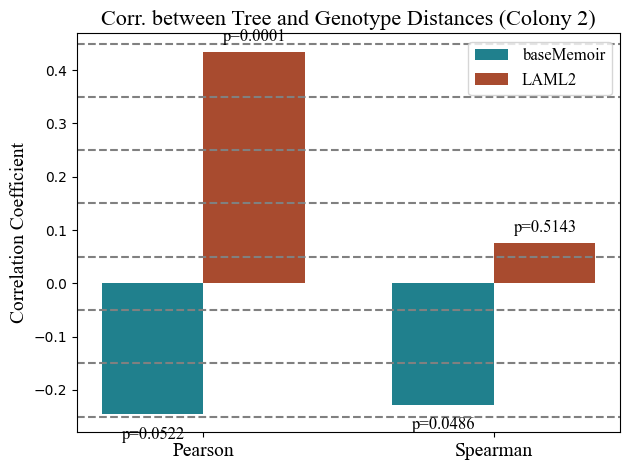

In [342]:
import matplotlib.pyplot as plt
import numpy as np

# Data from your results
data = {
    'baseMemoir': [
        (-0.24548396211822382, 0.05219478052194781),
        (-0.22807401371010763, 0.048595140485951406),
#         (-0.09391675919135654, 0.10998900109989002)
    ],
    'LAML2': [
        (0.4349557118108213, 9.999000099990002e-05),
        (0.075211005509347, 0.5143485651434857),
#         (0.14009888395631298, 0.0633936606339366)
    ]
}

# Labels for the x-axis
methods = ['Pearson', 'Spearman'] # , 'Kendall\'s Tau']

# Extracting data for plotting
baseMemoir_values = [item[0] for item in data['baseMemoir']]
LAML2_values = [item[0] for item in data['LAML2']]
baseMemoir_pvalues = [item[1] for item in data['baseMemoir']]
LAML2_pvalues = [item[1] for item in data['LAML2']]

# Plotting
x = np.arange(len(methods))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, baseMemoir_values, width, label='baseMemoir', color='#20808D')
rects2 = ax.bar(x + width/2, LAML2_values, width, label='LAML2', color='#A84B2F')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Correlation Coefficient', fontname='Times New Roman', fontsize=14)
ax.set_title('Corr. between Tree and Genotype Distances (Colony 2)', fontname='Times New Roman', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(methods, fontname='Times New Roman', fontsize=14)
ax.legend(prop={'family': 'Times New Roman', 'size': 12})

# Adding dashed lines for the y-axis
dash_style = {'color': 'gray', 'linestyle': '--'}
for yline in np.arange(-0.25, 0.5, 0.1):  # Adjust limits as needed
    ax.axhline(y=yline, **dash_style)

# Function to attach a text label above each bar displaying its height
def autolabel(rects, pvalues, above=True):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect, pvalue in zip(rects, pvalues):
        height = rect.get_height()
        if above:
            ax.annotate(f'p={pvalue:.4f}',
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 5),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom', fontname='Times New Roman', fontsize=12)
        else:
            ax.annotate(f'p={pvalue:.4f}',
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, -9),  # Move text below the bar
                        textcoords="offset points",
                        ha='center', va='top', fontname='Times New Roman', fontsize=12)

autolabel(rects1, baseMemoir_pvalues, above=False)
autolabel(rects2, LAML2_pvalues)

fig.tight_layout()
#plt.show()
plt.savefig("/Users/gc3045/laml2_experiments/figures/distance_correlation_p2.pdf")

In [343]:
# get indices pos2_cell15, pos2_cell9, post2_cell14
desired_indices = ['pos2_cell15', 'pos2_cell9', 'pos2_cell14']
genotype_subset = laml2_genotype_df.loc[desired_indices]
output_path = "/Users/gc3045/laml2_experiments/proc_realdata/laml2_pos2_subset.csv"
genotype_subset.to_csv(output_path)


In [344]:
# Extract lists for 'pos2_cell15' and 'pos2_cell20'
list_pos2_cell15 = baseMem_genotypes['pos2_cell15']
list_pos2_cell20 = baseMem_genotypes['pos2_cell20']

# Create DataFrame by stacking the lists
stacked_df = pd.DataFrame({
    'pos2_cell15': list_pos2_cell15,
    'pos2_cell20': list_pos2_cell20
})


In [345]:
stacked_df = stacked_df.T

In [346]:
stacked_df

,0,1,2,3,4,5,6,7,8,9,...,386,387,388,389,390,391,392,393,394,395
pos2_cell15,0,1,0,1,3,3,-1,-1,-1,-1,...,-1,-1,-1,-1,0,0,0,0,0,1
pos2_cell20,1,0,1,2,2,3,2,0,0,2,...,2,3,0,1,0,0,1,0,0,1


In [347]:
# Define the output path
output_path = "/Users/gc3045/laml2_experiments/proc_realdata/baseMem_pos2_subset.csv"

# Write DataFrame to CSV
stacked_df.to_csv(output_path, index=True)

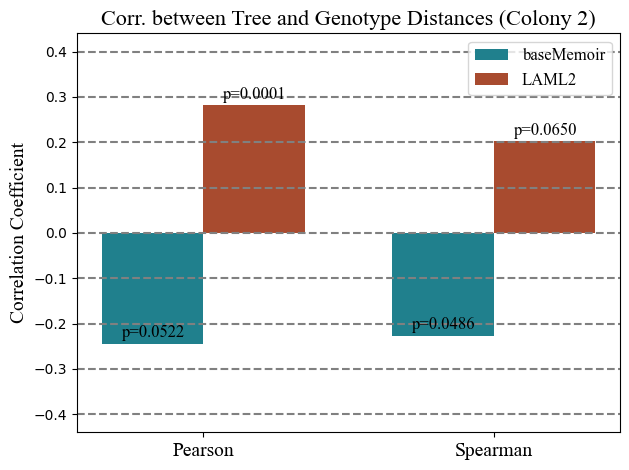

In [348]:
import matplotlib.pyplot as plt
import numpy as np

# baseMemoir (0.16752933609763657, 0.19318068193180682, 30)
# LAML2 (0.28143208386832347, 9.999000099990002e-05, 30)
# baseMemoir (0.20336761297228784, 0.07999200079992001, 30)
# LAML2 (0.20197213682130688, 0.06529347065293471, 30)

# Data from your results
data = {
    'baseMemoir': [
        (-0.24548396211822382, 0.05219478052194781),
        (-0.22807401371010763, 0.048595140485951406),
#         (-0.09391675919135654, 0.10998900109989002)
    ],
    'LAML2': [
        (0.28143208386832347, 9.999000099990002e-05),
        (0.20197213682130688, 0.064993500649935),
    ]
}

# Labels for the x-axis
methods = ['Pearson', 'Spearman'] # , 'Kendall\'s Tau']

# Extracting data for plotting
baseMemoir_values = [item[0] for item in data['baseMemoir']]
LAML2_values = [item[0] for item in data['LAML2']]
baseMemoir_pvalues = [item[1] for item in data['baseMemoir']]
LAML2_pvalues = [item[1] for item in data['LAML2']]

# Plotting
x = np.arange(len(methods))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, baseMemoir_values, width, label='baseMemoir', color='#20808D')
rects2 = ax.bar(x + width/2, LAML2_values, width, label='LAML2', color='#A84B2F')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Correlation Coefficient', fontname='Times New Roman', fontsize=14)
ax.set_title('Corr. between Tree and Genotype Distances (Colony 2)', fontname='Times New Roman', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(methods, fontname='Times New Roman', fontsize=14)
ax.legend(prop={'family': 'Times New Roman', 'size': 12})

# Adding dashed lines for the y-axis
dash_style = {'color': 'gray', 'linestyle': '--'}
for yline in np.arange(-0.4, 0.5, 0.1):  # Adjust limits as needed
    ax.axhline(y=yline, **dash_style)

# Function to attach a text label above each bar displaying its height
def autolabel(rects, pvalues, above=True):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect, pvalue in zip(rects, pvalues):
        height = rect.get_height()
        if above:
            ax.annotate(f'p={pvalue:.4f}',
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 2),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom', fontname='Times New Roman', fontsize=12)
        else:
            ax.annotate(f'p={pvalue:.4f}',
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 5),  # Move text below the bar
                        textcoords="offset points",
                        ha='center', va='top', fontname='Times New Roman', fontsize=12)

autolabel(rects1, baseMemoir_pvalues)
autolabel(rects2, LAML2_pvalues)

fig.tight_layout()
# plt.show()
plt.savefig("/Users/gc3045/laml2_experiments/figures/distance_correlation_p2_v2.pdf")

In [349]:
# compute average hamming distance between the two
# compute rf distance between the two tree topologies

In [353]:
laml2_distmat['pos2_cell15']['pos2_cell14'], laml2_distmat['pos2_cell15']['pos2_cell9']

(0.856853, 0.856853)